In [0]:
# https://www.datacamp.com/courses/python-data-science-toolbox-part-2

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Using iterators in PythonLand

#### Introduction to iterators

In [0]:
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']



*   Create a for loop to loop over flash and print the values in the list. Use person as the loop variable.



In [0]:
# Print each list item in flash using a for loop
for person in flash:
    print(person)

jay garrick
barry allen
wally west
bart allen




*   Create an iterator for the list flash and assign the result to superspeed.

*   Print each of the items from superspeed using next() 4 times.



In [0]:
# Create an iterator for flash: superspeed
superspeed = iter(flash)

In [0]:
# Print each item from the iterator
print(next(superspeed))
print(next(superspeed))
print(next(superspeed))
print(next(superspeed))

jay garrick
barry allen
wally west
bart allen


**range()**

Recall that range() doesn't actually create the list; instead, it creates a range object with an iterator that produces the values until it reaches the limit (in the example, until the value 4). 

In [0]:
range(3)

range(0, 3)

In [0]:
# Create an iterator for range(3): small_value
small_value = iter(range(3))

In [0]:
# Print the values in small_value
print(next(small_value))
print(next(small_value))
print(next(small_value))

0
1
2


In [0]:
# Loop over range(3) and print the values
for num in range(3):
    print(num)

0
1
2


In [0]:
# Create an iterator for range(10 ** 100): googol
googol = iter(range(10 ** 100))

In [0]:
# Print the first 5 values from googol
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))

0
1
2
3
4


**Iterators as function arguments**

values ranging from 10 to 20: range(10, **21**)

In [0]:
# Create a range object: values
values = range(10, 21)

In [0]:
# Print the range object
print(values)

range(10, 21)


In [0]:
# Create a list of integers: values_list
values_list = list(values)

In [0]:
# Print values_list
print(values_list)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [0]:
# Get the sum of values: values_sum
values_sum = sum(values)

In [0]:
# Print values_sum
print(values_sum)

165


#### Playing with iterators

**Using enumerate**

Recall that enumerate() returns an enumerate object that produces a sequence of tuples, and each of the tuples is an index-value pair.

In this exercise, you are given a list of strings mutants and you will practice using enumerate() on it by printing out a list of tuples and unpacking the tuples using a for loop.

In [0]:
# Create a list of strings: mutants
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pryde']

In [0]:
# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))

# Print the list of tuples
print(mutant_list)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]


In [0]:
# Unpack and print the tuple pairs
for index1, value1 in enumerate(mutants):
    print(index1, value1)

0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde


In [0]:
# Change the start index
for index2, value2 in enumerate(mutants, start=1): # edit starting index
    print(index2, value2)

**Using zip**

Another interesting function that you've learned is zip(), which takes any number of iterables and returns a zip object that is an iterator of tuples. 

If you wanted to print the values of a zip object, you can convert it into a list and then print it. Printing just a zip object will not return the values unless you unpack it first. In this exercise, you will explore this for yourself.

In [0]:
mutants = ['charles xavier',
 'bobby drake',
 'kurt wagner',
 'max eisenhardt',
 'kitty pryde']

In [0]:
aliases = ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']

In [0]:
powers = ['telepathy',
 'thermokinesis',
 'teleportation',
 'magnetokinesis',
 'intangibility']

In [0]:
# Create a list of tuples: mutant_data
mutant_data = list(zip(mutants, aliases, powers))

In [0]:
# Print the list of tuples
print(mutant_data)

[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pryde', 'shadowcat', 'intangibility')]


In [0]:
# Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants, aliases, powers)

In [0]:
# Print the zip object
print(mutant_zip)

In [0]:
# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pryde shadowcat intangibility


**Using * and zip to 'unzip'**

We can, however, reverse what has been zipped together by using zip() with a little help from *! * unpacks an iterable such as a list or a tuple into positional arguments in a function call.

In [0]:
# Create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

In [0]:
# Print the tuples in z1 by unpacking with *
print(*z1)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')


In [0]:
# Re-create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

In [0]:
zip(*z1)

In [0]:
# 'Unzip' the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

In [0]:
# Check if unpacked tuples are equivalent to original tuples
print(result1 == mutants)
print(result2 == powers)

False
False


#### Using iterators to load large files into memory

**Processing large amounts of Twitter data**

In this exercise, you will process a large csv file of Twitter data in the same way that you processed 'tweets.csv' in Bringing it all together exercises of the prequel course, but this time, working on it in chunks of 10 entries at a time.

In [0]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

In [0]:
# Iterate over the file chunk by chunk
for chunk in pd.read_csv('/content/tweets.csv', chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

In [0]:
# Print the populated dictionary
print(counts_dict)

{'en': 97, 'et': 1, 'und': 2}


In [0]:
# Define count_entries()
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict


In [0]:
# Call count_entries(): result_counts
result_counts = count_entries('/content/tweets.csv', 10, 'lang')

In [0]:
# Print result_counts
print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


## 2. List comprehensions and generators

#### List comprehensions

In [0]:
doctor = ['house', 'cuddy', 'chase', 'thirteen', 'wilson']

In [0]:
# to produce first character of each word
[doc[0] for doc in doctor]

['h', 'c', 'c', 't', 'w']



*   Using the range of numbers from 0 to 9 as your iterable and i as your iterator variable, write a list comprehension that produces a list of numbers consisting of the squared values of i.



In [0]:
# Create list comprehension: squares
squares = [i**2 for i in range(0,10)] # num from 0 - 9 

**Nested list comprehensions**

Your task is to recreate the matrix below by using nested listed comprehensions. 

Recall that you can create one of the rows of the matrix with a single list comprehension. To create the list of lists, you simply have to supply the list comprehension as the output expression of the overall list comprehension:

[[*output expression*] for *iterator variable* in *iterable*]

In [0]:
matrix = [[0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4],
          [0, 1, 2, 3, 4]]

In [0]:
# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(5)] for row in range(5)]

In [0]:
# Print the matrix
for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


#### Advanced comprehensions



*   Use member as the iterator variable in the list comprehension. For the conditional, use len() to evaluate the iterator variable. Note that you only want strings with 7 characters or more.



In [0]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

In [0]:
# Create list comprehension: new_fellowship
new_fellowship = [member for member in fellowship if len(member) >= 7]

In [0]:
# Print the new list
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']




*  In the output expression, keep the string as-is if the number of characters is >= 7, else replace it with an empty string - that is, '' or "".



In [0]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

In [0]:
# Create list comprehension: new_fellowship
new_fellowship = [member if len(member) >= 7 else '' for member in fellowship]

In [0]:
# Print the new list
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


**Dict comprehensions**

You will create a dictionary using the comprehension syntax for this exercise. In this case, the comprehension is called a dict comprehension.

Recall that the main difference between a list comprehension and a dict comprehension is the use of curly braces {} instead of []. Additionally, members of the dictionary are created using a colon :, as in <key> : <value>.

You are given a list of strings fellowship and, using a dict comprehension, create a dictionary with the members of the list as the keys and the length of each string as the corresponding values.

In [0]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']



*   Create a dict comprehension where the key is a string in fellowship and the value is the length of the string. 
*   Remember to use the syntax <key> : <value> in the output expression part of the comprehension to create the members of the dictionary. 



In [0]:
# Create dict comprehension: new_fellowship
new_fellowship = { member:len(member) for member in fellowship }

In [0]:
# Print the new list
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


#### Introduction to generator expressions



> List of strings

fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']


> List comprehension

fellow1 = [member for member in fellowship if len(member) >= 7]

> Generator expression

fellow2 = (member for member in fellowship if len(member) >= 7)


**List comprehension vs generators**



*   A list comprehension produces a list as output, 
*   a generator produces a generator object.


Recall that generator expressions basically have the same syntax as list comprehensions, except that it uses parentheses () instead of brackets []

> **Task**:



*   Create a generator object that will produce values from 0 to 30. Assign the result to result and use num as the iterator variable in the generator expression.
*   Print the first 5 values by using next() appropriately in print().




In [0]:
# Create generator object: result
result = (num for num in range(31))

In [0]:
# Print the first 5 values
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))

0
1
2
3
4


In [0]:
# Print the rest of the values
for value in result:
    print(value)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


**Changing the output in generator expressions**



*   Write a generator expression that will generate the lengths of each string in lannister. Use person as the iterator variable. Assign the result to lengths.

*   Supply the correct iterable in the for loop for printing the values in the generator object.



In [0]:
# Create a list of strings: lannister
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

In [0]:
# Create a generator object: lengths
lengths =(len(person) for person in lannister) 

In [0]:
# Iterate over and print the values in lengths
for value in lengths:
    print(value)

6
5
5
6
7


**Build a generator**

Generator functions are functions that, like generator expressions, yield a series of values, instead of returning a single value. A generator function is defined as you do a regular function, but whenever it generates a value, it uses the keyword yield instead of return.



*   generator function: yield
*   generator expression: return



In [0]:
# Create a list of strings
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

In [0]:
# Define generator function get_lengths
def get_lengths(input_list):
    """Generator function that yields the
    length of the strings in input_list."""

    # Yield the length of a string
    for person in input_list:
        yield len(person)

In [0]:
# Print the values generated by get_lengths()
for value in get_lengths(lannister):
    print(value)

6
5
5
6
7


#### Wrapping up comprehensions and generators

**List comprehensions for time-stamped data**

You will also be introduced to a data structure, the pandas Series, in this exercise.

In [0]:
df = pd.read_csv('/content/tweets.csv')
df.shape

(100, 31)

In [0]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'filter_level',
       'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'timestamp_ms',
       'truncated', 'user'],
      dtype='object')



*   Each row is a string that represents a timestamp, and you will access the 12th to 19th characters in the string to extract the time. 



In [0]:
# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

In [0]:
# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time]

In [0]:
# Print the extracted times
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

**Conditional list comprehensions for time-stamped data**

In [0]:
# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

In [0]:
# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

In [0]:
# Print the extracted times
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


## 3. Bringing it all together!

#### Welcome to the case study!

**Dictionaries for data science**

For this exercise, you'll use what you've learned about the zip() function and combine two lists into a dictionary.

These lists are actually extracted from a bigger dataset file of world development indicators from the World Bank. 



*   Create a zip object by calling zip() and passing to it feature_names and row_vals. Assign the result to zipped_lists.
*   Create a dictionary from the zipped_lists zip object by calling dict() with zipped_lists. Assign the resulting dictionary to rs_dict.



In [0]:
world = pd.read_csv('/content/world_ind_pop_data.csv')
world.head(5)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [0]:
feature_names = ['CountryName',
 'CountryCode',
 'IndicatorName',
 'IndicatorCode',
 'Year',
 'Value']

In [0]:
row_vals = ['Arab World',
 'ARB',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'SP.ADO.TFRT',
 '1960',
 '133.56090740552298']

In [0]:
# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

In [0]:
# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

In [0]:
# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


**Writing a function to help you**



*   Define the function lists2dict() with two parameters: first is list1 and second is list2.

*   Return the resulting dictionary rs_dict in lists2dict().
*   Call the lists2dict() function with the arguments feature_names and row_vals. Assign the result of the function call to rs_fxn.



In [0]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

In [0]:
# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)

In [0]:
# Print rs_fxn
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


**Using a list comprehension**

This time, you're going to use the lists2dict() function you defined in the last exercise to turn a bunch of lists into a list of dictionaries with the help of a list comprehension.



*   Inspect the contents of row_lists by printing the first two lists in row_lists.

*   List item
*   List item


*   List item



In [0]:
feature_names = ['CountryName',
 'CountryCode',
 'IndicatorName',
 'IndicatorCode',
 'Year',
 'Value']

In [0]:
#@title
row_lists = [['Arab World',
  'ARB',
  'Adolescent fertility rate (births per 1,000 women ages 15-19)',
  'SP.ADO.TFRT',
  '1960',
  '133.56090740552298'],
 ['Arab World',
  'ARB',
  'Age dependency ratio (% of working-age population)',
  'SP.POP.DPND',
  '1960',
  '87.7976011532547'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, old (% of working-age population)',
  'SP.POP.DPND.OL',
  '1960',
  '6.634579191565161'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, young (% of working-age population)',
  'SP.POP.DPND.YG',
  '1960',
  '81.02332950839141'],
 ['Arab World',
  'ARB',
  'Arms exports (SIPRI trend indicator values)',
  'MS.MIL.XPRT.KD',
  '1960',
  '3000000.0'],
 ['Arab World',
  'ARB',
  'Arms imports (SIPRI trend indicator values)',
  'MS.MIL.MPRT.KD',
  '1960',
  '538000000.0'],
 ['Arab World',
  'ARB',
  'Birth rate, crude (per 1,000 people)',
  'SP.DYN.CBRT.IN',
  '1960',
  '47.697888095096395'],
 ['Arab World',
  'ARB',
  'CO2 emissions (kt)',
  'EN.ATM.CO2E.KT',
  '1960',
  '59563.9892169935'],
 ['Arab World',
  'ARB',
  'CO2 emissions (metric tons per capita)',
  'EN.ATM.CO2E.PC',
  '1960',
  '0.6439635478877049'],
 ['Arab World',
  'ARB',
  'CO2 emissions from gaseous fuel consumption (% of total)',
  'EN.ATM.CO2E.GF.ZS',
  '1960',
  '5.041291753975099'],
 ['Arab World',
  'ARB',
  'CO2 emissions from liquid fuel consumption (% of total)',
  'EN.ATM.CO2E.LF.ZS',
  '1960',
  '84.8514729446567'],
 ['Arab World',
  'ARB',
  'CO2 emissions from liquid fuel consumption (kt)',
  'EN.ATM.CO2E.LF.KT',
  '1960',
  '49541.707291032304'],
 ['Arab World',
  'ARB',
  'CO2 emissions from solid fuel consumption (% of total)',
  'EN.ATM.CO2E.SF.ZS',
  '1960',
  '4.72698138789597'],
 ['Arab World',
  'ARB',
  'Death rate, crude (per 1,000 people)',
  'SP.DYN.CDRT.IN',
  '1960',
  '19.7544519237187'],
 ['Arab World',
  'ARB',
  'Fertility rate, total (births per woman)',
  'SP.DYN.TFRT.IN',
  '1960',
  '6.92402738655897'],
 ['Arab World',
  'ARB',
  'Fixed telephone subscriptions',
  'IT.MLT.MAIN',
  '1960',
  '406833.0'],
 ['Arab World',
  'ARB',
  'Fixed telephone subscriptions (per 100 people)',
  'IT.MLT.MAIN.P2',
  '1960',
  '0.6167005703199'],
 ['Arab World',
  'ARB',
  'Hospital beds (per 1,000 people)',
  'SH.MED.BEDS.ZS',
  '1960',
  '1.9296220724398703'],
 ['Arab World',
  'ARB',
  'International migrant stock (% of population)',
  'SM.POP.TOTL.ZS',
  '1960',
  '2.9906371279862403'],
 ['Arab World',
  'ARB',
  'International migrant stock, total',
  'SM.POP.TOTL',
  '1960',
  '3324685.0']]
print('row list length: ', len(row_lists))

row list length:  20


In [0]:
# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])

['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547']


In [0]:
# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

In [0]:
# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', 'IndicatorCode': 'SP.POP.DPND', 'Year': '1960', 'Value': '87.7976011532547'}


**Turning this all into a DataFrame**

You will now use of all these to convert the list of dictionaries into a pandas DataFrame. 

In [0]:
# Import the pandas package
import pandas as pd

In [0]:
# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

In [0]:
# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list_of_dicts)

In [0]:
# Print the head of the DataFrame
print(df.head())

  CountryCode CountryName  ...               Value  Year
0         ARB  Arab World  ...  133.56090740552298  1960
1         ARB  Arab World  ...    87.7976011532547  1960
2         ARB  Arab World  ...   6.634579191565161  1960
3         ARB  Arab World  ...   81.02332950839141  1960
4         ARB  Arab World  ...           3000000.0  1960

[5 rows x 6 columns]


#### Using Python generators for streaming data

**Processing data in chunks**

The csv file 'world_dev_ind.csv' is in your current directory for your use. 

To begin, you need to open a connection to this file using what is known as a context manager. 

For example, the command with open('datacamp.csv') as datacamp binds the csv file 'datacamp.csv' as datacamp in the context manager. Here, the with statement is the context manager, and its purpose is to ensure that resources are efficiently allocated when opening a connection to a file.

In [0]:
# Open a connection to the file
with open('/content/world_ind_pop_data.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(0, 1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1


**Writing a generator to load data in chunks**

Generators allow users to lazily evaluate data. This concept of lazy evaluation is useful when you have to deal with very large datasets because it lets you generate values in an efficient manner by yielding only chunks of data at a time instead of the whole thing at once.

In this exercise, you will define a generator function read_large_file() that produces a generator object which yields a single line from a file each time next() is called on it. 

In [0]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data

In [0]:
# Open a connection to the file
with open('/content/world_ind_pop_data.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



In [0]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

In [0]:
# Open a connection to the file
with open('/content/world_ind_pop_data.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

In [0]:
# Print            
print(counts_dict)

{'CountryName': 1, 'Arab World': 55, 'Caribbean small states': 55, 'Central Europe and the Baltics': 55, 'East Asia & Pacific (all income levels)': 55, 'East Asia & Pacific (developing only)': 55, 'Euro area': 55, 'Europe & Central Asia (all income levels)': 55, 'Europe & Central Asia (developing only)': 55, 'European Union': 55, 'Fragile and conflict affected situations': 55, 'Heavily indebted poor countries (HIPC)': 55, 'High income': 55, 'High income: nonOECD': 55, 'High income: OECD': 55, 'Latin America & Caribbean (all income levels)': 55, 'Latin America & Caribbean (developing only)': 55, 'Least developed countries: UN classification': 55, 'Low & middle income': 55, 'Low income': 55, 'Lower middle income': 55, 'Middle East & North Africa (all income levels)': 55, 'Middle East & North Africa (developing only)': 55, 'Middle income': 55, 'North America': 55, 'OECD members': 55, 'Other small states': 55, 'Pacific island small states': 55, 'Small states': 55, 'South Asia': 55, 'Sub-Sa

#### Using pandas read_csv iterator for streaming data

**Writing an iterator to load data in chunks**

Another way to read data too large to store in memory in chunks is to read the file in as DataFrames of a certain length, say, 100. For example, with the pandas package (imported as pd), you can do pd.read_csv(filename, chunksize=100). This creates an iterable reader object, which means that you can use next() on it.

In [0]:
# Import the pandas package
import pandas as pd

In [0]:
# Initialize reader object: df_reader
df_reader = pd.read_csv('/content/world_ind_pop_data.csv', chunksize=10)

In [0]:
# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName  ... Urban population (% of total)
0                                 Arab World  ...                     31.285384
1                     Caribbean small states  ...                     31.597490
2             Central Europe and the Baltics  ...                     44.507921
3    East Asia & Pacific (all income levels)  ...                     22.471132
4      East Asia & Pacific (developing only)  ...                     16.917679
5                                  Euro area  ...                     62.096947
6  Europe & Central Asia (all income levels)  ...                     55.378977
7    Europe & Central Asia (developing only)  ...                     38.066129
8                             European Union  ...                     61.212898
9   Fragile and conflict affected situations  ...                     17.891972

[10 rows x 5 columns]
                                      CountryName  ... Urban population (% of total)
10         H

In [0]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('/content/world_ind_pop_data.csv', chunksize=1000)

In [0]:
# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

In [0]:
# Check out the head of the DataFrame
print(df_urb_pop.head())

                               CountryName  ... Urban population (% of total)
0                               Arab World  ...                     31.285384
1                   Caribbean small states  ...                     31.597490
2           Central Europe and the Baltics  ...                     44.507921
3  East Asia & Pacific (all income levels)  ...                     22.471132
4    East Asia & Pacific (developing only)  ...                     16.917679

[5 rows x 5 columns]


In [0]:
# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']

In [0]:
# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

In [0]:
# Turn zip object into list: pops_list
pops_list = list(pops)

In [0]:
# Print pops_list
print(pops_list)

[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]




*   Write a list comprehension to generate a list of values from pops_list for the new column 'Total Urban Population'. 
> *   The output expression should be the product of the first and second element in each tuple in pops_list.
> *  Because the 2nd element is a percentage, you also need to either multiply the result by 0.01 or divide it by 100.


*   Create a scatter plot where the x-axis are values from the 'Year' column and the y-axis are values from the 'Total Urban Population' column.



In [0]:
pops_list[0][0]

91401583.0

In [0]:
pops_list[0][1]

44.5079211390026

In [0]:
# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
import matplotlib.pyplot as plt

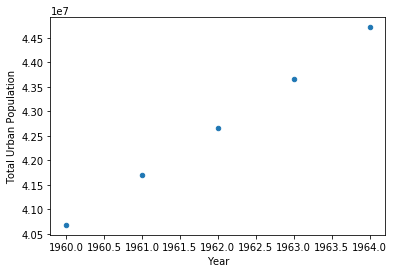

In [0]:
# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()



*   Initialize an empty DataFrame data using pd.DataFrame().

*   In the for loop, iterate over urb_pop_reader to be able to process all the DataFrame chunks in the dataset.
*   Using append() on data, append df_pop_ceb to data.



In [0]:
# Initialize empty DataFrame: data
data = pd.DataFrame()

In [0]:
# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


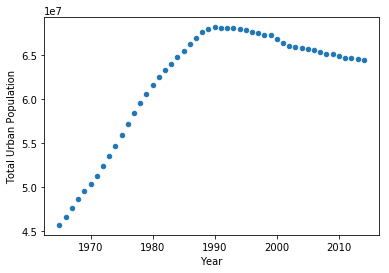

In [0]:
# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

This is the last leg. You've learned a lot about processing a large dataset in chunks. In this last exercise, you will put all the code for processing the data into a single function so that you can reuse the code without having to rewrite the same things all over again.

Because all of the previous code you've written in the previous exercises will be housed in plot_pop(), calling the function already does the following:







*   Loading of the file chunk by chunk,

*   Creating the new column of urban population values, and
*   Plotting the urban population data.



In [0]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()


In [0]:
# Set the filename: fn
fn = '/content/world_ind_pop_data.csv'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


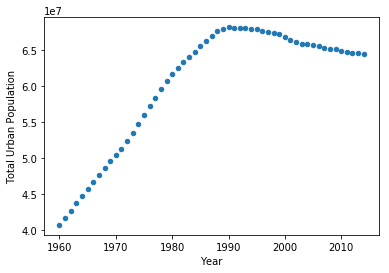

In [0]:
# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


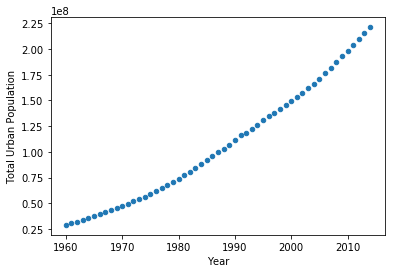

In [0]:
# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')